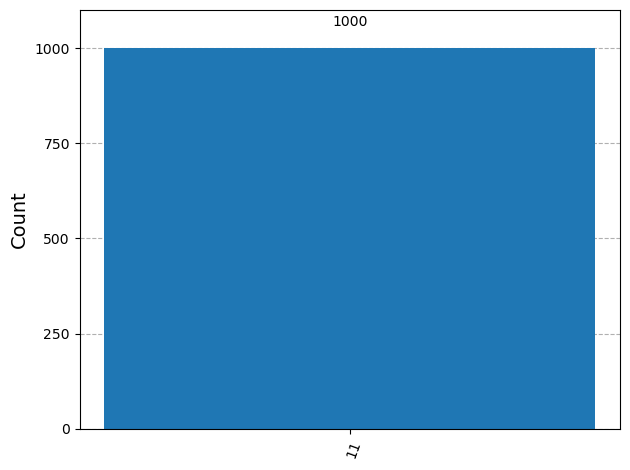

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Anzahl Qubits (2 für 4 Elemente)
n_qubits = 2

# Quantenschaltkreis erstellen
grover_circuit = QuantumCircuit(n_qubits, n_qubits)

# Schritt 1: Überlagerung aller Zustände
grover_circuit.h(range(n_qubits))

# Schritt 2: Orakel für '11' (markiert den Zielzustand)
grover_circuit.cz(0, 1)  # Kontrolliertes Z-Gatter zwischen Qubit 0 und 1

# Schritt 3: Diffusor (Amplitudenverstärkung)
grover_circuit.h(range(n_qubits))
grover_circuit.z(range(n_qubits))
grover_circuit.cz(0, 1)
grover_circuit.h(range(n_qubits))

# Messen
grover_circuit.measure(range(n_qubits), range(n_qubits))

# Simulator
simulator = AerSimulator()
compiled = transpile(grover_circuit, simulator)

# Ausführen (1000 Durchläufe)
job = simulator.run(compiled, shots=1000)
result = job.result()
counts = result.get_counts()


# Visualisieren
plot_histogram(counts)


In [14]:
def linear_search(target, data):
    steps = 0
    for item in data:
        steps += 1
        if item == target:
            return steps
    return -1

data = ['00', '01', '10', '11']
target = '11'

steps = linear_search(target, data)
print(f"Klassische Suche benötigte {steps} Schritte.")
# Ausgabe: Klassische Suche benötigte 4 Schritte.


Klassische Suche benötigte 4 Schritte.
